Import Libraries


In [1]:
import pandas as pd
import numpy as np
import os


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_validate


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)


import joblib


import missingno as msno
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import warnings

warnings.filterwarnings("ignore")


pd.set_option("display.max_columns", None)

- Load dataset


In [2]:
df = pd.read_csv("../data/Preprocessed_data.csv")
df = df.iloc[:2000]

In [3]:
df.columns.to_list()

['user_id',
 'location',
 'age',
 'isbn',
 'rating',
 'book_title',
 'book_author',
 'year_of_publication',
 'publisher',
 'img_s',
 'img_m',
 'img_l',
 'Summary',
 'Language',
 'Category',
 'city',
 'state',
 'country']

In [4]:
print("\n--- Dataset Info ---\n")
df.info()
print("\n")

print("\n--- First 5 Records ---\n")
display(df.head().style.hide(axis='index'))
print("\n")

print("\n--- Shape of Dataset ---\n")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print("\n")

print("\n--- Data Types ---\n")
print(df.dtypes)
print("\n")


--- Dataset Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2000 non-null   int64  
 1   location             2000 non-null   object 
 2   age                  2000 non-null   float64
 3   isbn                 2000 non-null   object 
 4   rating               2000 non-null   int64  
 5   book_title           2000 non-null   object 
 6   book_author          2000 non-null   object 
 7   year_of_publication  2000 non-null   int64  
 8   publisher            2000 non-null   object 
 9   img_s                2000 non-null   object 
 10  img_m                2000 non-null   object 
 11  img_l                2000 non-null   object 
 12  Summary              2000 non-null   object 
 13  Language             2000 non-null   object 
 14  Category             2000 non-null   object 
 15  city           

user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
2,"stockton, california, usa",18.000000,195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg,"Provides an introduction to classical myths placing the addressed topics within their historical context, discussion of archaeological evidence as support for mythical events, and how these themes have been portrayed in literature, art, ...",en,['Social Science'],stockton,california,usa
8,"timmins, ontario, canada",34.743900,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her sister, Nora, who is bound for New York.",en,['Actresses'],timmins,ontario,canada
11400,"ottawa, ontario, canada",49.000000,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her sister, Nora, who is bound for New York.",en,['Actresses'],ottawa,ontario,canada
11676,"n/a, n/a, n/a",34.743900,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her sister, Nora, who is bound for New York.",en,['Actresses'],nan,nan,nan
41385,"sudbury, ontario, canada",34.743900,2005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,"In a small town in Canada, Clara Callan reluctantly takes leave of her sister, Nora, who is bound for New York.",en,['Actresses'],sudbury,ontario,canada





--- Shape of Dataset ---

Rows: 2000, Columns: 18



--- Data Types ---

user_id                  int64
location                object
age                    float64
isbn                    object
rating                   int64
book_title              object
book_author             object
year_of_publication      int64
publisher               object
img_s                   object
img_m                   object
img_l                   object
Summary                 object
Language                object
Category                object
city                    object
state                   object
country                 object
dtype: object




- Find missing values



--- Missing Values Count ---

user_id                 0
location                9
age                     0
isbn                    0
rating                  0
book_title              0
book_author             0
year_of_publication     0
publisher               0
img_s                   0
img_m                   0
img_l                   0
Summary                 0
Language                0
Category                0
city                   13
state                  51
country                40
dtype: int64


<Figure size 1200x600 with 0 Axes>

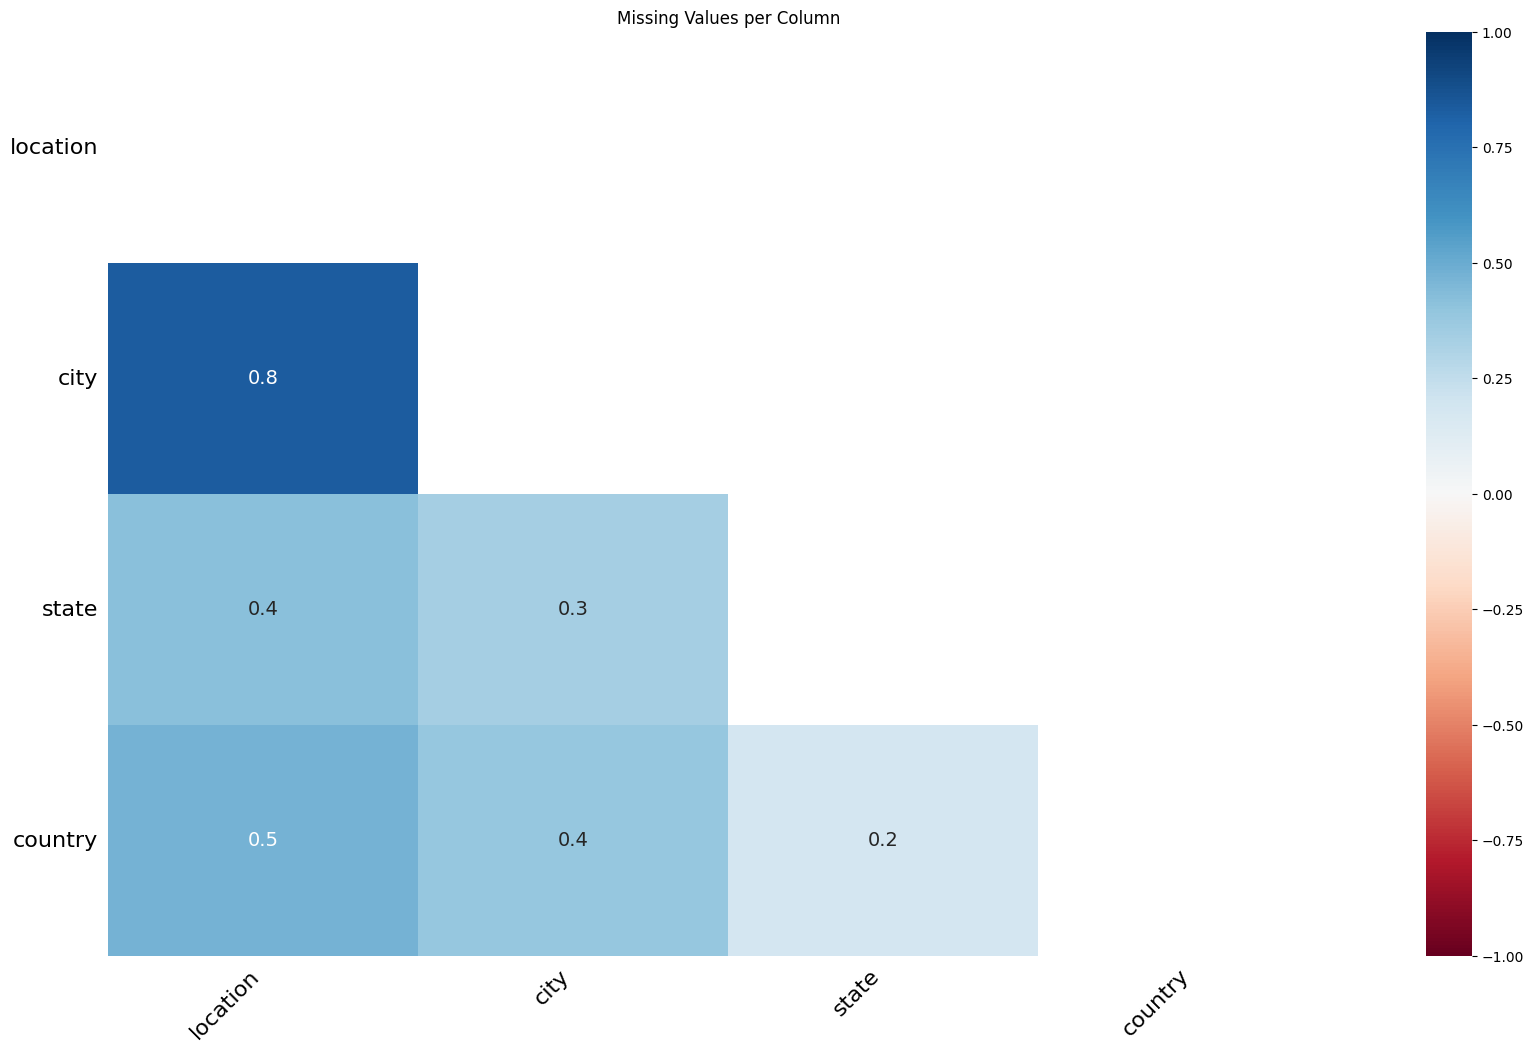

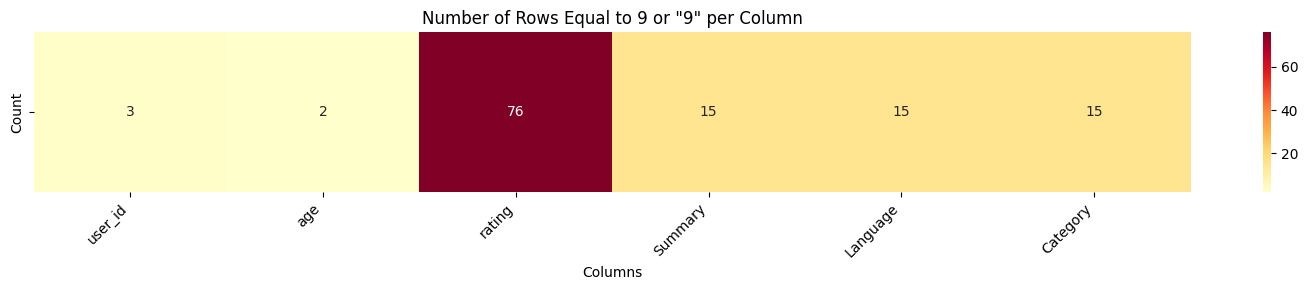


--- Rows with value exactly 9 or '9' per Column ---

user_id              3 rows
age                  2 rows
rating               76 rows
Summary              15 rows
Language             15 rows
Category             15 rows


In [5]:
df = df.replace(["n/a", "N/A", "NA", "na", "NaN", "nan", "n/a, n/a, n/a"], np.nan)

print("\n--- Missing Values Count ---\n")
print(df.isnull().sum())


plt.figure(figsize=(12, 6))
msno.heatmap(df)
plt.title("Missing Values per Column")
plt.show()


def getColumnsWithValueNine():
    nine_counts = {}
    for column in df.columns:
        
        if df[column].dtype in [np.number]:
            count = df[df[column] == 9].shape[0]
    
        else:
            count = df[df[column].astype(str) == '9'].shape[0]
        
        if count > 0:
            nine_counts[column] = count


    counts_df = pd.DataFrame([nine_counts], index=['Count'])


    plt.figure(figsize=(15, 3))
    sns.heatmap(counts_df, annot=True, fmt='g', cmap='YlOrRd')
    plt.title('Number of Rows Equal to 9 or "9" per Column')
    plt.xlabel('Columns')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


    print("\n--- Rows with value exactly 9 or '9' per Column ---\n")
    for col, count in nine_counts.items():
        print(f"{col:20} {count:,} rows")
        
        
getColumnsWithValueNine()


- Handling missing values


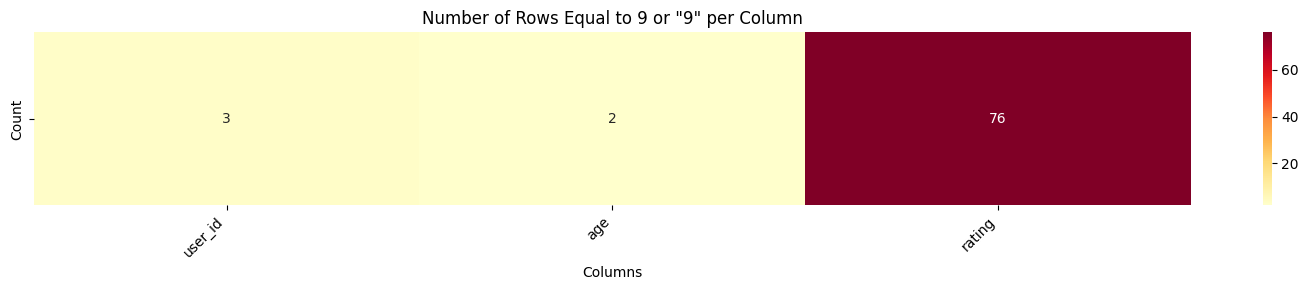


--- Rows with value exactly 9 or '9' per Column ---

user_id              3 rows
age                  2 rows
rating               76 rows


In [6]:

if 'Summary' in df.columns:
    df.loc[df['Summary'].astype(str) == '9', 'Summary'] = 'No Summary'

if 'Language' in df.columns:
    df.loc[df['Language'].astype(str) == '9', 'Language'] = 'Other'
    
if 'Category' in df.columns:
    df.loc[df['Category'].astype(str) == '9', 'Category'] = 'Unknown'


getColumnsWithValueNine()


In [7]:

df["location"] = df["location"].fillna("Unknown")
df["city"] = df["city"].fillna("Unknown")
df["state"] = df["state"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")

df = df.dropna()


print("\n--- Missing Values Count ---\n")
print(df.isnull().sum())


--- Missing Values Count ---

user_id                0
location               0
age                    0
isbn                   0
rating                 0
book_title             0
book_author            0
year_of_publication    0
publisher              0
img_s                  0
img_m                  0
img_l                  0
Summary                0
Language               0
Category               0
city                   0
state                  0
country                0
dtype: int64


- Check for duplicates


In [8]:
print("\n--- Duplicate Records ---\n")
print(df.duplicated().sum())


df.drop_duplicates(inplace=True)


print("\n--- Shape After Removing Duplicates ---\n")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


--- Duplicate Records ---

0

--- Shape After Removing Duplicates ---

Rows: 2000, Columns: 18


- Dataset info


In [9]:
print("\n--- Number data ---\n")
display(df.describe())

print("\n--- Value data ---\n")
display(df.describe(include=["O"]))


--- Number data ---



,user_id,age,rating,year_of_publication
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,95240.885000,35.249621,1.901500,2001.497000
std,68034.902209,11.244654,3.238988,3.631747
min,2.000000,9.000000,0.000000,1988.000000
25%,41415.000000,28.000000,0.000000,1999.000000
50%,85231.000000,34.743900,0.000000,2004.000000
75%,127516.500000,40.000000,3.000000,2004.000000
max,278418.000000,84.000000,10.000000,2004.000000



--- Value data ---



,location,isbn,book_title,book_author,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
count,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
unique,1352,27,27,27,27,27,27,27,23,2,13,1225,290,59
top,"timmins, ontario, canada",971880107,Wild Animus,Rich Shapero,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"Wild animus is a search for the primordial, a ...",en,['Fiction'],timmins,california,usa
freq,18,1231,1231,1231,1231,1231,1231,1231,1231,1985,1877,18,162,1172


- Outlier Detection and Handling


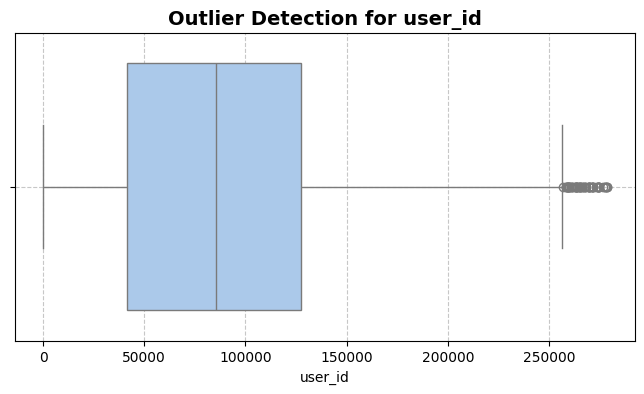

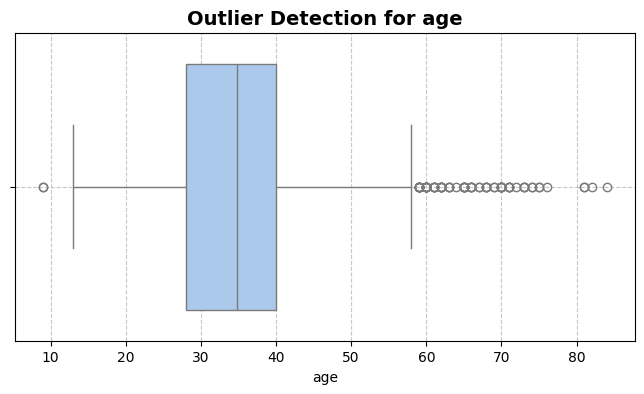

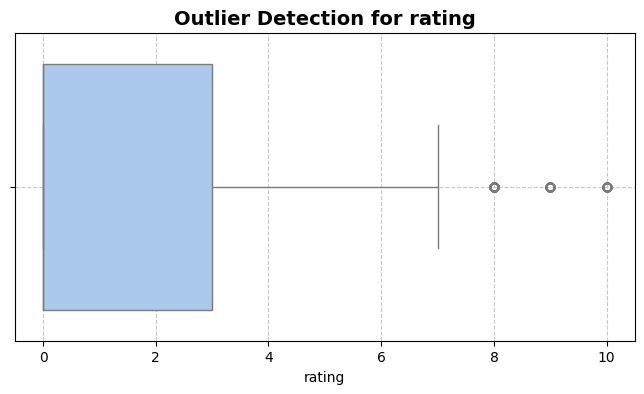

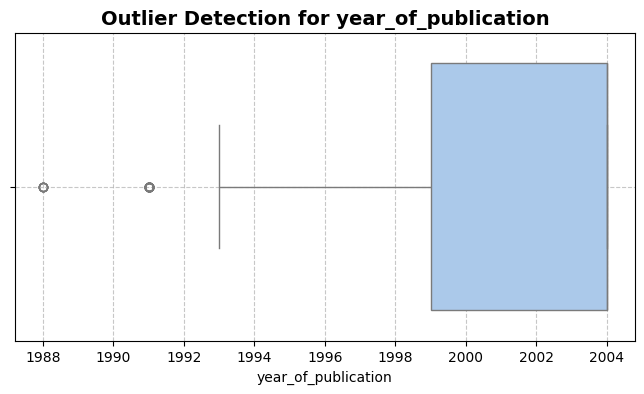

In [10]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], palette="pastel")
    plt.title(f"Outlier Detection for {col}", fontsize=14, fontweight="bold")
    plt.xlabel(col)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()

- Removing Outliers


In [11]:
# Calculate Q1 (25th percentile) of the age column
Q1 = df["age"].quantile(0.25)

# Calculate Q3 (75th percentile) of the age column 
Q3 = df["age"].quantile(0.75)

# Calculate the Interquartile Range (IQR) which is Q3 - Q1
IQR = Q3 - Q1

# Calculate the lower bound for outlier detection
# Any value less than (Q1 - 1.5*IQR) is considered an outlier
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)

# Calculate the upper bound for outlier detection
# Any value greater than (Q3 + 1.5*IQR) is considered an outlier
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

# Filter the dataframe to keep only rows where age is within bounds
# This removes age outliers from the dataset
df = df[(df["age"] >= lower_bound) & (df["age"] <= upper_bound)]

10.0
58.0


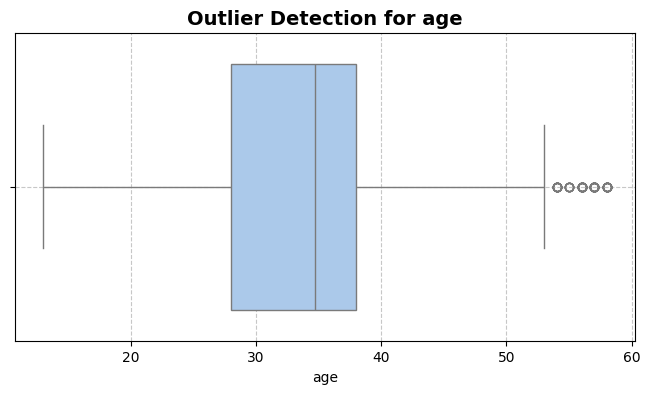

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["age"], palette="pastel")
plt.title("Outlier Detection for age", fontsize=14, fontweight="bold")
plt.xlabel("age")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

- Distribution of Numerical Features


In [13]:
df["rating"].value_counts()

rating
0     1351
8       94
7       78
9       73
5       65
6       64
10      59
1       39
2       38
3       35
4       25
Name: count, dtype: int64

In [14]:
numerical_columns = ["age", "rating", "year_of_publication"]


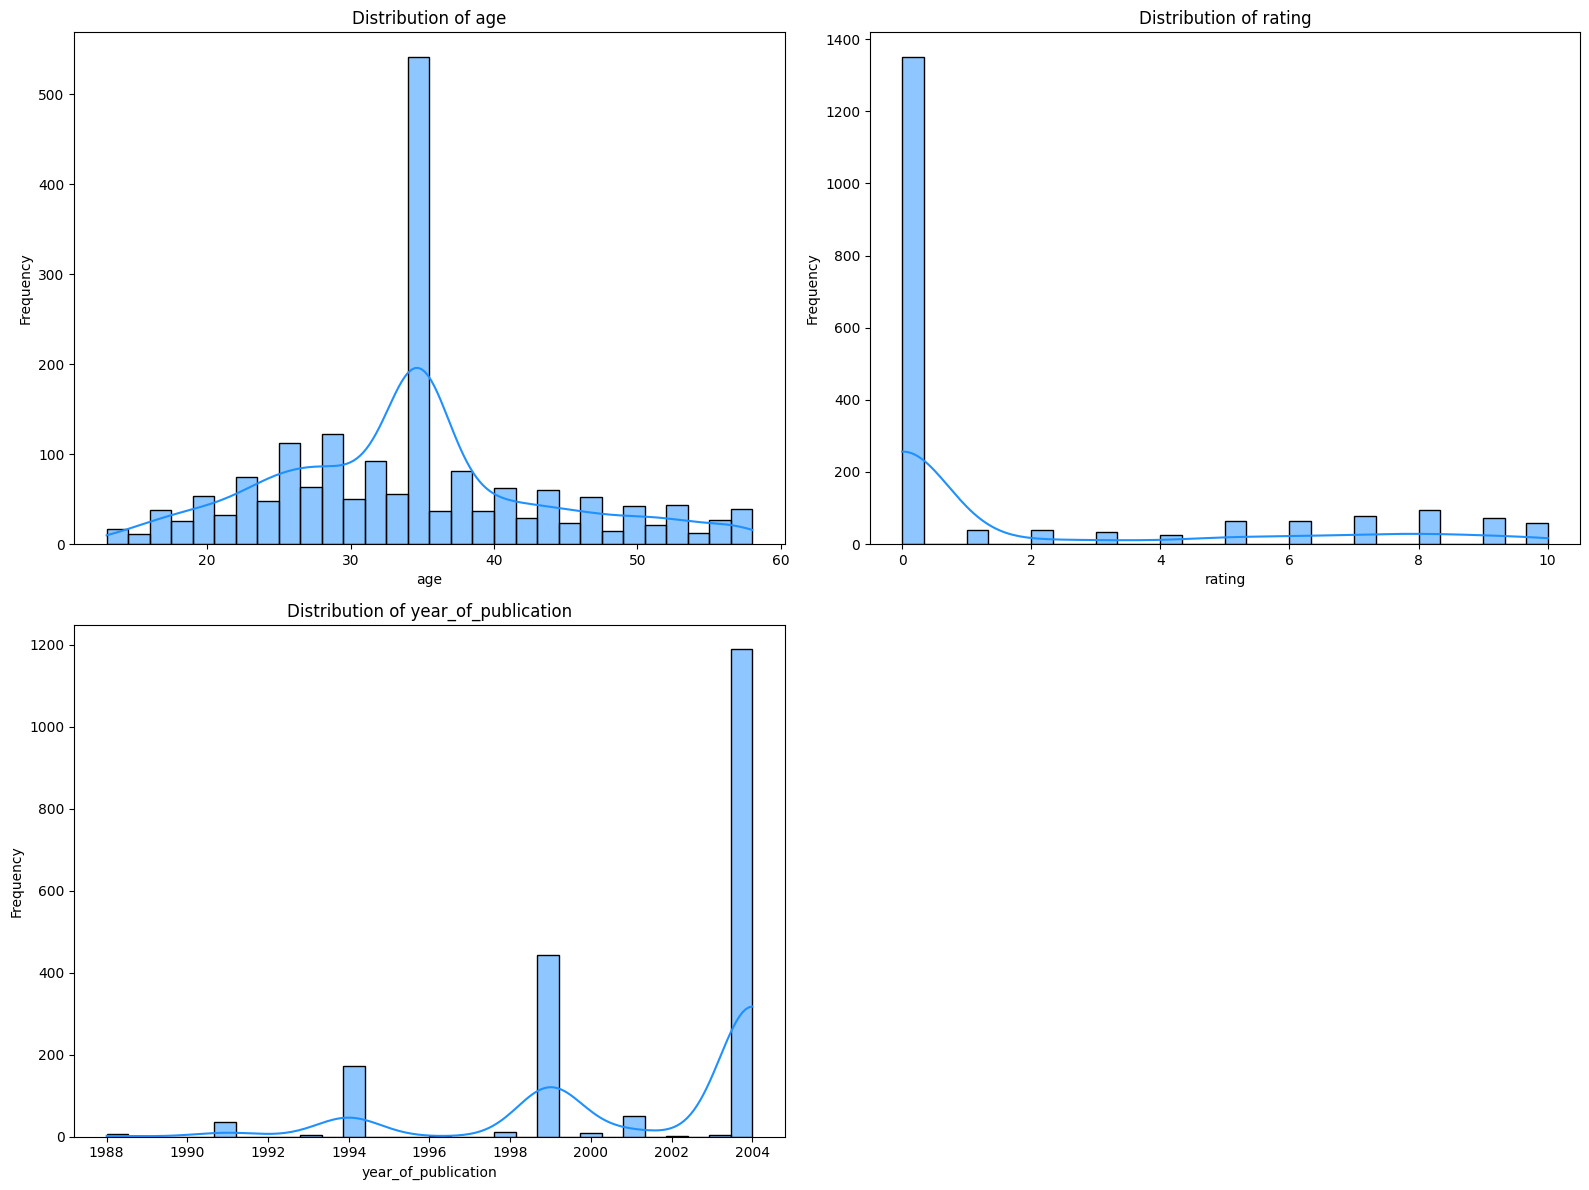

In [15]:
def plotDistribution(): 
    

    plt.figure(figsize=(16, 12))

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], kde=True, bins=30, color="dodgerblue")
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")


    plt.tight_layout()
    plt.show()

plotDistribution()

* Since 0 in rating column means the book was not rated

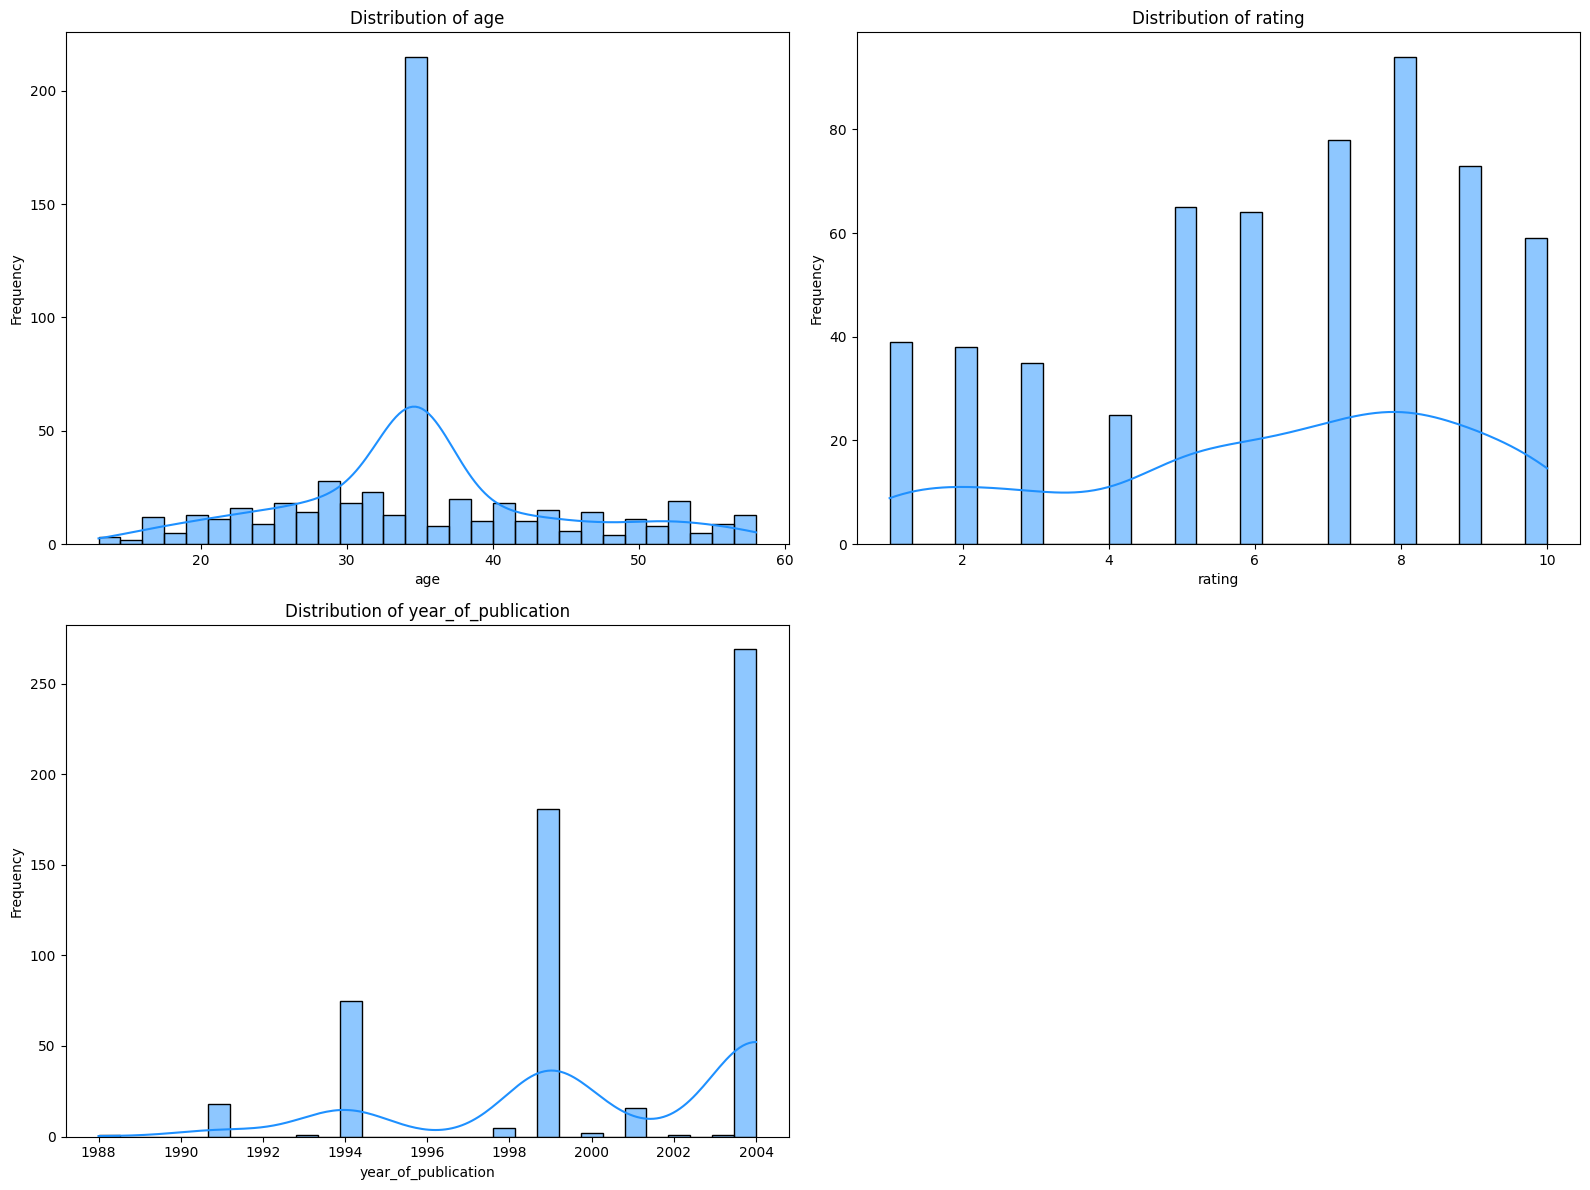

In [16]:
df = df[df["rating"] != 0]
df = df.reset_index(drop=True)
plotDistribution()

* Clean ISBN Column

In [17]:
non_numeric_isbn = df[~df['isbn'].str.isnumeric()]
print("ISBNs containing non-numeric characters:")
print(non_numeric_isbn[['isbn', 'book_title']]) 


ISBNs containing non-numeric characters:
          isbn                               book_title
34  074322678X  Where You'll Find Me: And Other Stories


In [18]:
df = df[df['isbn'].str.isnumeric()]
df = df.reset_index(drop=True)


- Correlation Heatmap for Numerical Features


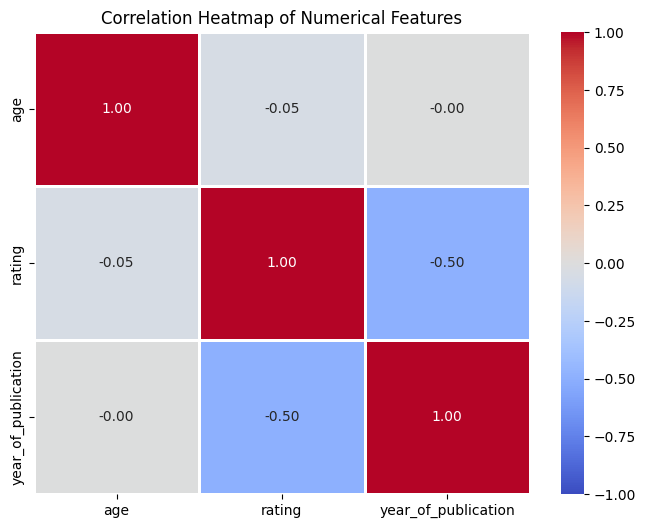

In [19]:
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=1,
    vmin=-1,
    vmax=1,
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

- Categorical Feature Visualizations


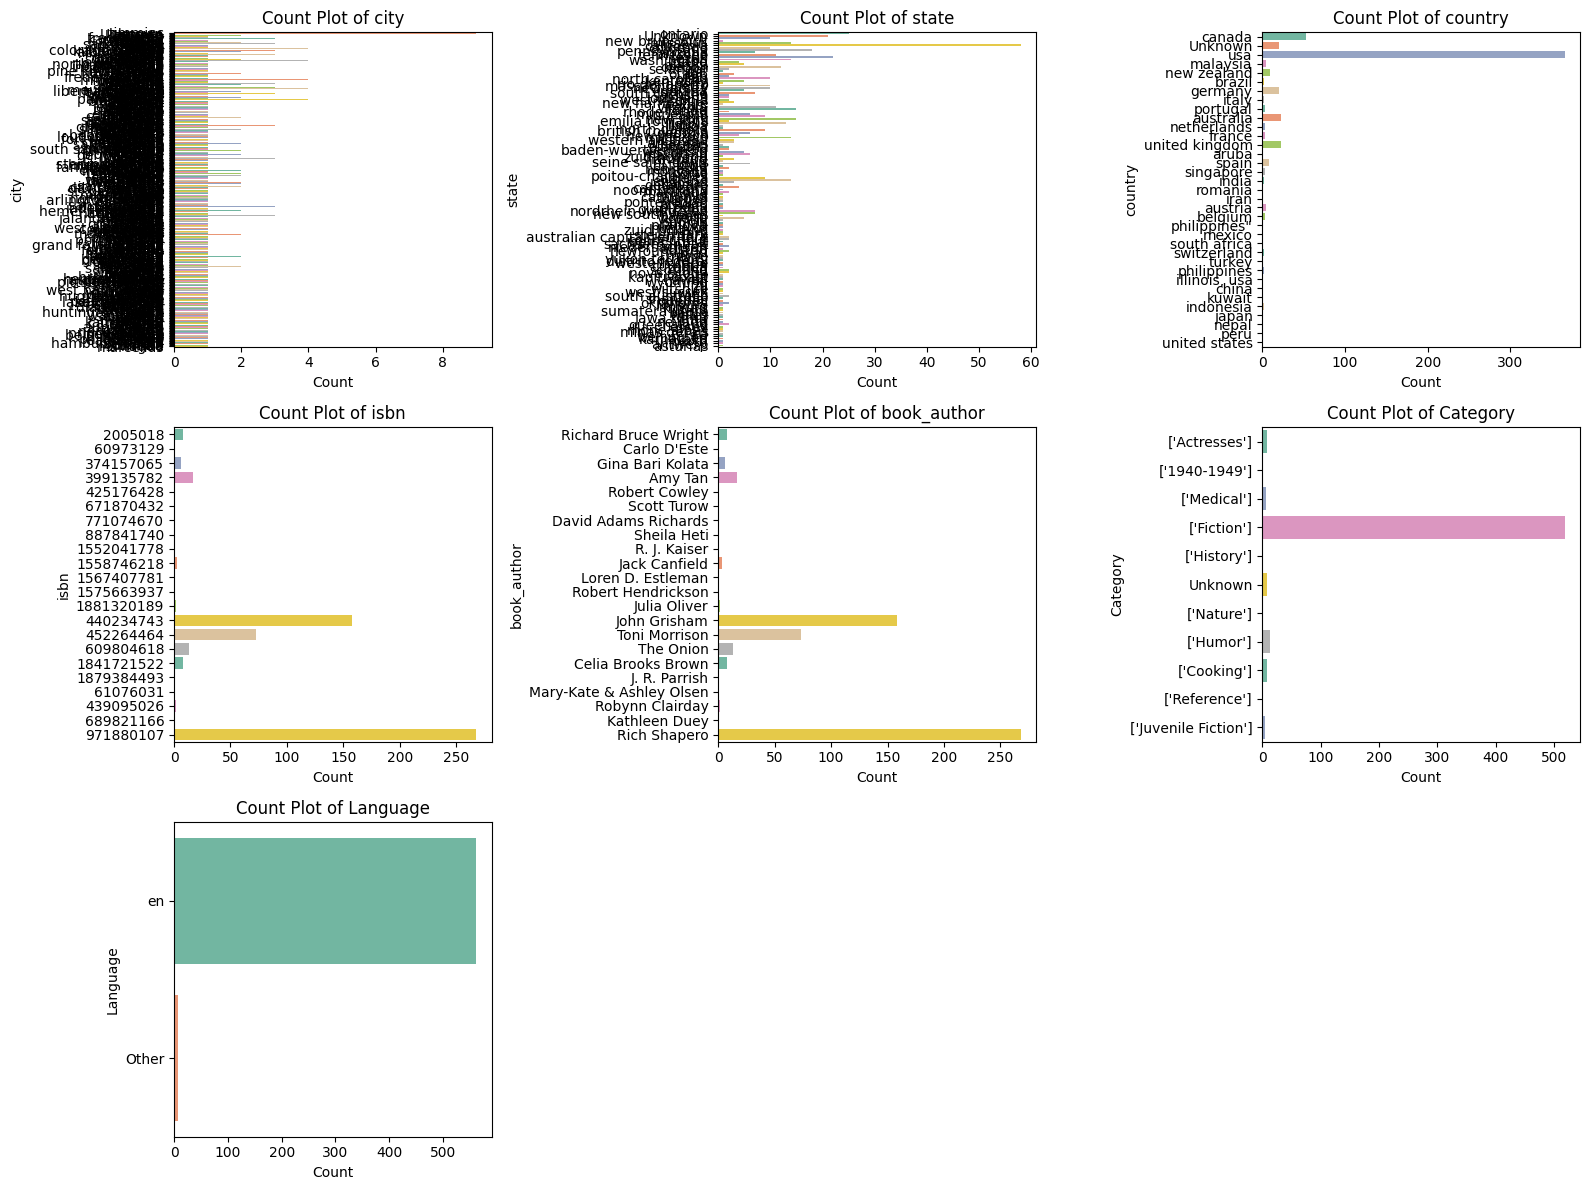

In [20]:
categorical_columns = [
    "city",
    "state",
    "country",
    "isbn",
    "book_author",
    "Category",
    "Language",
]

plt.figure(figsize=(16, 12))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=df[column], palette="Set2")
    plt.title(f"Count Plot of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [21]:
df.dtypes

user_id                  int64
location                object
age                    float64
isbn                    object
rating                   int64
book_title              object
book_author             object
year_of_publication      int64
publisher               object
img_s                   object
img_m                   object
img_l                   object
Summary                 object
Language                object
Category                object
city                    object
state                   object
country                 object
dtype: object

- Create New Features


In [22]:
df["book_popularity"] = df.groupby("isbn")["rating"].transform("count")

df["user_avg_rating"] = df.groupby("user_id")["rating"].transform("mean")

df["book_avg_rating"] = df.groupby("isbn")["rating"].transform("mean")

bins = [0, 18, 30, 50, 100]
labels = ["Young", "Adult", "Middle-Aged", "Senior"]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=False)

# Model


In [23]:
df.columns.to_list()


['user_id',
 'location',
 'age',
 'isbn',
 'rating',
 'book_title',
 'book_author',
 'year_of_publication',
 'publisher',
 'img_s',
 'img_m',
 'img_l',
 'Summary',
 'Language',
 'Category',
 'city',
 'state',
 'country',
 'book_popularity',
 'user_avg_rating',
 'book_avg_rating',
 'age_group']

In [24]:
model1_df = df.copy()

In [25]:
model1_df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country,book_popularity,user_avg_rating,book_avg_rating,age_group
0,8,"timmins, ontario, canada",34.7439,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada,8,5.666667,7.75,Middle-Aged
1,11676,Unknown,34.7439,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],Unknown,Unknown,Unknown,8,8.125000,7.75,Middle-Aged
2,67544,"toronto, ontario, canada",30.0000,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],toronto,ontario,canada,8,8.000000,7.75,Middle-Aged
3,116866,"ottawa, ,",34.7439,2005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,",",Unknown,8,9.000000,7.75,Middle-Aged
4,123629,"kingston, ontario, canada",34.7439,2005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],kingston,ontario,canada,8,9.000000,7.75,Middle-Aged


In [26]:
if os.path.exists("./dist/rating_model_training_data.csv"):
    os.remove("./dist/rating_model_training_data.csv")
model1_df.to_csv("./dist/rating_model_training_data.csv", index=False)

- Categorical Encoding


In [27]:

label_columns = [
    "book_title",
    "book_author",
    "publisher",
    "Language",
    "Category",
    "age_group",
]

numeric_columns = [
    "user_id",
    "age",
    "isbn",
    "year_of_publication",
    "book_popularity",
    "user_avg_rating",
    "book_avg_rating",
]

column_transformer = ColumnTransformer(
    transformers=[
        (
            "label_column",
            OneHotEncoder(handle_unknown="ignore"),
            label_columns,
        ),
        (
            "scaler",
            StandardScaler(),
            numeric_columns,
        ),
    ],
    remainder="passthrough",
)


In [28]:
model1_df.head()

,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country,book_popularity,user_avg_rating,book_avg_rating,age_group
0,8,"timmins, ontario, canada",34.7439,2005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada,8,5.666667,7.75,Middle-Aged
1,11676,Unknown,34.7439,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],Unknown,Unknown,Unknown,8,8.125000,7.75,Middle-Aged
2,67544,"toronto, ontario, canada",30.0000,2005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],toronto,ontario,canada,8,8.000000,7.75,Middle-Aged
3,116866,"ottawa, ,",34.7439,2005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,",",Unknown,8,9.000000,7.75,Middle-Aged
4,123629,"kingston, ontario, canada",34.7439,2005018,9,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],kingston,ontario,canada,8,9.000000,7.75,Middle-Aged


+ Feature Selection

In [29]:
unwanted_columns = [
    "location",
    "rating",
    "img_s",
    "img_m",
    "img_l",
    "Summary",
    "city",
    "state",
    "country",
]

model1_X = model1_df.drop(columns=unwanted_columns)
model1_y = model1_df["rating"]

In [30]:
model1_X.columns.to_list()


['user_id',
 'age',
 'isbn',
 'book_title',
 'book_author',
 'year_of_publication',
 'publisher',
 'Language',
 'Category',
 'book_popularity',
 'user_avg_rating',
 'book_avg_rating',
 'age_group']

* Validation-Set Approach

In [31]:
model1_X_train, model1_X_test, model1_y_train, model1_y_test = train_test_split(
    model1_X, model1_y, test_size=0.2, random_state=42
)


In [32]:
model1_X_train


,user_id,age,isbn,book_title,book_author,year_of_publication,publisher,Language,Category,book_popularity,user_avg_rating,book_avg_rating,age_group
68,48911,57.0000,440234743,The Testament,John Grisham,1999,Dell,en,['Fiction'],158,10.0,7.613924,Senior
181,240951,41.0000,440234743,The Testament,John Grisham,1999,Dell,en,['Fiction'],158,10.0,7.613924,Middle-Aged
63,38718,34.7439,440234743,The Testament,John Grisham,1999,Dell,en,['Fiction'],158,9.0,7.613924,Middle-Aged
248,146932,30.0000,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,en,['Fiction'],73,10.0,7.808219,Middle-Aged
60,30533,34.7439,440234743,The Testament,John Grisham,1999,Dell,en,['Fiction'],158,6.0,7.613924,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,55027,44.0000,440234743,The Testament,John Grisham,1999,Dell,en,['Fiction'],158,7.0,7.613924,Middle-Aged
106,112093,35.0000,440234743,The Testament,John Grisham,1999,Dell,en,['Fiction'],158,4.0,7.613924,Middle-Aged
270,258109,37.0000,452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,en,['Fiction'],73,10.0,7.808219,Middle-Aged
435,67415,29.0000,971880107,Wild Animus,Rich Shapero,2004,Too Far,en,['Fiction'],268,3.0,4.626866,Adult


In [33]:
model1_y_train


68     10
181    10
63      9
248    10
60      6
       ..
71      7
106     4
270    10
435     3
102     9
Name: rating, Length: 455, dtype: int64

In [34]:
models = {
    "RandomForest": Pipeline(
        [
            ("preprocessor", column_transformer),
            ("model", RandomForestRegressor(n_estimators=100, random_state=42)),
        ]
    ),
    "GradientBoosting": Pipeline(
        [
            ("preprocessor", column_transformer),
            ("model", GradientBoostingRegressor(random_state=42)),
        ]
    ),
    "LinearRegression": Pipeline(
        [("preprocessor", column_transformer), ("model", LinearRegression())]
    ),
    "KNN": Pipeline(
        [("preprocessor", column_transformer), ("model", KNeighborsRegressor())]
    ),
}


* Model Evaluation

In [35]:
# def evaluate_model(model, X_train, y_train, X_test, y_test):
    
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)

#     return {"MAE": mae, "MSE": mse, "RMSE": rmse, "R²": r2}


In [36]:
def evaluate_model_with_cv(model, X, y, scoring="neg_mean_squared_error", cv=5):
    cv_results = cross_validate(
        model, X, y, cv=cv, scoring=scoring, return_train_score=False
    )
    return cv_results["test_score"]


In [37]:
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name} using cross-validation...")
    r2_scores = evaluate_model_with_cv(
        model, model1_X_train, model1_y_train, scoring="r2", cv=5
    )
    print(r2_scores)
    mae_scores = evaluate_model_with_cv(
        model, model1_X_train, model1_y_train, scoring="neg_mean_absolute_error", cv=5
    )
    mse_scores = evaluate_model_with_cv(
        model, model1_X_train, model1_y_train, scoring="neg_mean_squared_error", cv=5
    )
    
    results[model_name] = {
        "R²": r2_scores.mean(),
        "MAE": -mae_scores.mean(), 
        "MSE": -mse_scores.mean(),  
    }
    
    print(
        f"{model_name} - R²: {results[model_name]['R²']:.4f}, MAE: {results[model_name]['MAE']:.4f}, MSE: {results[model_name]['MSE']:.4f}"
    )
    print("-" * 40)

results_df = pd.DataFrame(results).T
print("\nModel Comparison using Cross-Validation:")
print(results_df)

Evaluating RandomForest using cross-validation...
[0.95997041 0.96172811 0.9913118  0.98691043 0.99086499]
RandomForest - R²: 0.9782, MAE: 0.0973, MSE: 0.1574
----------------------------------------
Evaluating GradientBoosting using cross-validation...
[0.97714647 0.96181621 0.98829707 0.98129509 0.99010241]
GradientBoosting - R²: 0.9797, MAE: 0.1128, MSE: 0.1457
----------------------------------------
Evaluating LinearRegression using cross-validation...
[0.98320266 0.96894636 0.99669759 0.98525341 0.99247505]
LinearRegression - R²: 0.9853, MAE: 0.1228, MSE: 0.1061
----------------------------------------
Evaluating KNN using cross-validation...
[0.8893617  0.88825608 0.94174729 0.86812055 0.92081293]
KNN - R²: 0.9017, MAE: 0.5952, MSE: 0.6854
----------------------------------------

Model Comparison using Cross-Validation:
                        R²       MAE       MSE
RandomForest      0.978157  0.097275  0.157424
GradientBoosting  0.979731  0.112764  0.145697
LinearRegression  0

* Finding the best model

In [38]:
best_model_name = results_df["R²"].idxmax()
best_model1 = models[best_model_name]
print(f"\nBest model based on R² score: {best_model_name}")


Best model based on R² score: LinearRegression


* Training the model

In [39]:
best_model1.fit(model1_X_train, model1_y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('label_column',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['book_title', 'book_author',
                                                   'publisher', 'Language',
                                                   'Category', 'age_group']),
                                                 ('scaler', StandardScaler(),
                                                  ['user_id', 'age', 'isbn',
                                                   'year_of_publication',
                                                   'book_popularity',
                                                   'user_avg_rating',
                                                   'book_avg_rating'])])),
                ('model', LinearRegression())])

* Predicting with test set

In [40]:
model1_y_pred = best_model1.predict(model1_X_test)


In [41]:
model1_y_pred


array([ 9.12925879,  8.07138377,  5.07231633,  4.95665807,  5.91382064,
        1.97583107,  7.92268317,  9.16379759,  7.07506352,  1.98221407,
        1.0137023 ,  5.03899902,  7.99168913,  1.04850899,  4.9347427 ,
        8.05871687,  3.94857708,  6.89167008,  9.02992411,  1.97518145,
        5.11363147,  5.95844811,  4.97639428,  8.89694752,  5.97382218,
        6.08194034,  1.03533649,  6.90308856,  6.93962076,  8.06889077,
        0.99308855,  3.0649569 ,  2.00337496,  1.97283754, 10.08000309,
        5.13372963, 10.01293385,  9.79769225,  8.80551835,  7.06684275,
        5.0885938 ,  5.96427994,  6.9253231 ,  9.12147729,  8.87940813,
        8.03802548,  5.92058734,  8.86386109,  0.98722644,  7.80410128,
        9.00973132,  8.169356  ,  8.26441781,  6.90086067,  7.03212674,
        5.93752015,  1.04951072, 10.0291042 ,  9.90210242,  8.02068035,
        7.07115024,  7.89233916,  2.94499848,  2.97471619,  2.03065373,
        5.13798758,  6.06190532,  7.07445697,  8.96155855,  7.94

* Evaluating the model

In [42]:
r2 = r2_score(model1_y_test, model1_y_pred)
mae = mean_absolute_error(model1_y_test, model1_y_pred) 
mse = mean_squared_error(model1_y_test, model1_y_pred) 


print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")


R²: 0.9840
MAE: 0.1054
MSE: 0.1113


In [43]:

if os.path.exists("./dist/book_rating_model.pkl"):
    os.remove("./dist/book_rating_model.pkl")
if os.path.exists("./dist/label_encoder.pkl"):
    os.remove("./dist/label_encoder.pkl")


joblib.dump(best_model1, "./dist/book_rating_model.pkl")


['./dist/book_rating_model.pkl']

In [44]:
linear_reg_model = joblib.load("./dist/book_rating_model.pkl")


In [812]:

new_data = pd.DataFrame(
    {
        "user_id": ["7589351"],
        "isbn": ["374157065"],
        "book_title": ["Some Book"],
        "book_author": ["Author Name"],
        "publisher": ["Publisher XYZ"],
        "Language": ["en"],
        "Category": ["Fiction"],
        "age_group": ["Adult"],
        "age": [31],
        "year_of_publication": [2020],
        "book_popularity": [9],
        "user_avg_rating": [9],
        "book_avg_rating": [9],
    }
)

predicted_rating = linear_reg_model.predict(new_data)[0]
y_pred_clipped = np.clip(predicted_rating, 1, 10)
print(predicted_rating)
print(y_pred_clipped)


5.836554403291926
5.836554403291926
